How well do jobs and skills pay for data analysts?
1. Evaluate median salary of top 5 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

#loading data
dataset = load_dataset('coachprerakmehta/data_jobs')
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and pd.notna(x) else x)
#If it's already a list (or is NaN), leave it as-is.

In [27]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [15]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

In [16]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]
df_US_top6['job_title_short'].unique()

array(['Data Engineer', 'Data Scientist', 'Data Analyst',
       'Senior Data Engineer', 'Senior Data Analyst',
       'Senior Data Scientist'], dtype=object)

In [25]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

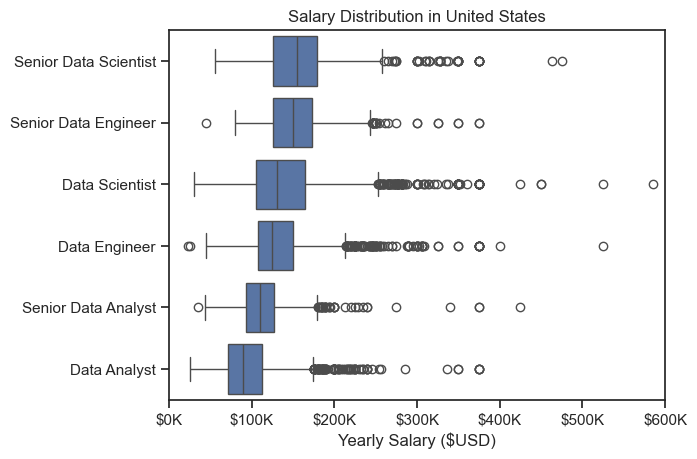

In [28]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)      
#unlike using pandas, we had to provide the data in a series manner, here using seaborn we have to provide data as data frame only defining x and y axis 

plt.title("Salary Distribution in United States")

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlabel("Yearly Salary ($USD)")
plt.ylabel("")
plt.xlim(0, 600000)
plt.show()

Investigate Median Salary vs Skill for Data Analysts

In [19]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [20]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [21]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [22]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [23]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
#first sorting accoring to count, then by median salary
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

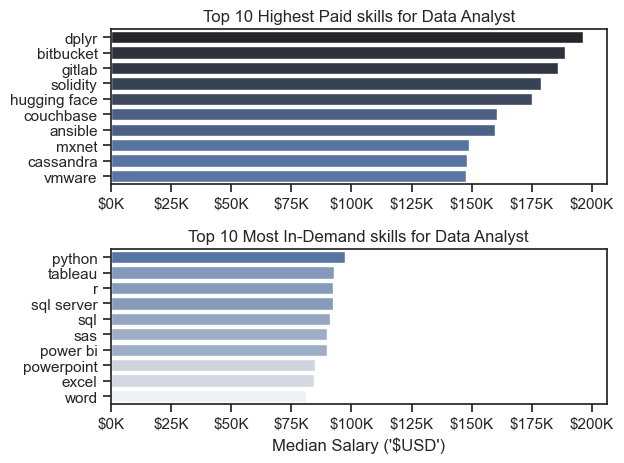

In [24]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)
#df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)           #for plotting this graph on the 1st subplot
#ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid skills for Data Analyst')
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b', legend=False)
#df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
#ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())        #sets the xlim of 2nd subplot equal to the 1st subplot
ax[1].set_title('Top 10 Most In-Demand skills for Data Analyst')
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary ('$USD')")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()